## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [6]:
import random
import numpy as np
from sklearn.datasets import load_boston


def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

def loss(y, y_hat): # to evaluate the performance
    dy = y - y_hat
    pos_total = np.sum(dy[(dy > 0)])
    neg_total = -np.sum(dy[dy < 0])
    return (pos_total + neg_total) / y.shape[0]

trying_times = 2000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

scalar = 0.1

update_time = 0

data = load_boston()

X, y = data['data'], data['target']

X_rm = X[:, 5]

best_k = best_b = 0

for i in range(trying_times):

    price_by_k_and_b = np.array([price(r, current_k, current_b) for r in X_rm])

    dy = y - price_by_k_and_b

    dy_gt_0_idx = dy > 0

    positive_dk = -sum(X_rm[dy_gt_0_idx])
    positive_db = -(np.sum(dy > 0))

    negtive_dk = sum(X_rm[dy < 0])
    negtive_db = (np.sum(dy < 0))

    dk = (positive_dk + negtive_dk) / X_rm.shape[0]
    db = positive_db + negtive_db / X_rm.shape[0]

    delt_k = 1 if dk < 0 else -1
    delt_b = 1 if db < 0 else -1

    current_k = current_k + delt_k * scalar
    current_b = current_b + delt_b * scalar

    price_by_k_and_b = np.array([price(r, current_k, current_b) for r in X_rm])
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss:  # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b

        update_time += 1

        if update_time % 10 == 0:
            print(
                'When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        pass

When time is : 9, get best_k: 47.537231037994204 best_b: -51.54293972840313, and the loss is: 224.67837080835085
When time is : 19, get best_k: 46.53723103799419 best_b: -52.54293972840314, and the loss is: 217.39373642099898
When time is : 29, get best_k: 45.537231037994175 best_b: -53.542939728403155, and the loss is: 210.1091020336471
When time is : 39, get best_k: 44.53723103799416 best_b: -54.54293972840317, and the loss is: 202.82446764629523
When time is : 49, get best_k: 43.53723103799415 best_b: -55.542939728403184, and the loss is: 195.53983325894333
When time is : 59, get best_k: 42.53723103799413 best_b: -56.5429397284032, and the loss is: 188.25519887159143
When time is : 69, get best_k: 41.53723103799412 best_b: -57.54293972840321, and the loss is: 180.9705644842396
When time is : 79, get best_k: 40.537231037994104 best_b: -58.542939728403226, and the loss is: 173.68593009688772
When time is : 89, get best_k: 39.53723103799409 best_b: -59.54293972840324, and the loss is: 

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [2]:
solution = {}
#@lru_cache(maxsize=2 ** 10)
def edit_distance(string1, string2):
    if len(string1) == 0:
        solution[('', string2)] = 'ADD before 1st char {}'.format(string2)
        return len(string2)
    if len(string2) == 0:
        solution[(string1, '')] = 'DEL prefix {} {}'.format(len(string1), string1)
        return len(string1)

    tail_s1 = string1[-1]
    tail_s2 = string2[-1]

    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}th char {}'.format(len(string1), tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD after {}th char {}'.format(len(string2) - 1, tail_s2)),  # string 1 add tail of string2
    ]

    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {}th char {} => {}'.format(len(string2), tail_s1, tail_s2))

    candidates.append(both_forward)

    min_distance, operation = min(candidates, key=lambda x: x[0])

    solution[(string1, string2)] = operation

    return min_distance

def parse_solution(src, obj, revenue_solution):
    if src == '':
        return ['ADD before 1st char {}'.format(obj)]
    if obj == '':
        return ['DEL last {}'.format(src)]
    if src == 'AB1' and obj == '1AB1':
        print(1)
    solve_exp = revenue_solution[(src, obj)]
    solve = solve_exp.split()
    if (0 == len(solve)):
        return parse_solution(src[:-1], obj[:-1], revenue_solution)
    else:
        if "ADD" == solve[0]:
            return parse_solution(src, obj[:-1], revenue_solution) + [solve_exp]
        if "DEL" == solve[0]:
            return parse_solution(src, obj + solve[3], revenue_solution) + [solve_exp]
        if "SUB" == solve[0]:
            return parse_solution(src[:-1], obj[:-1], revenue_solution) + [solve_exp]


print(edit_distance('AB1CDE', '1ABCCrfDE'))
for k, v in solution.items():
    print(k,  v)
print('--------- action ------------')
for v in parse_solution('AB1CDE', '1ABCCrfDE', solution):
    print(v)

4
('', '1ABCCrfDE') ADD before 1st char 1ABCCrfDE
('', '1ABCCrfD') ADD before 1st char 1ABCCrfD
('', '1ABCCrf') ADD before 1st char 1ABCCrf
('', '1ABCCr') ADD before 1st char 1ABCCr
('', '1ABCC') ADD before 1st char 1ABCC
('', '1ABC') ADD before 1st char 1ABC
('', '1AB') ADD before 1st char 1AB
('', '1A') ADD before 1st char 1A
('', '1') ADD before 1st char 1
('A', '') DEL prefix 1 A
('', '') ADD before 1st char 
('A', '1') SUB 1th char A => 1
('A', '1A') 
('A', '1AB') ADD after 2th char B
('A', '1ABC') ADD after 3th char C
('A', '1ABCC') ADD after 4th char C
('A', '1ABCCr') ADD after 5th char r
('A', '1ABCCrf') ADD after 6th char f
('A', '1ABCCrfD') ADD after 7th char D
('A', '1ABCCrfDE') ADD after 8th char E
('AB', '') DEL prefix 2 AB
('AB', '1') DEL 2th char B
('AB', '1A') DEL 2th char B
('AB', '1AB') 
('AB', '1ABC') ADD after 3th char C
('AB', '1ABCC') ADD after 4th char C
('AB', '1ABCCr') ADD after 5th char r
('AB', '1ABCCrf') ADD after 6th char f
('AB', '1ABCCrfD') ADD after 7th 

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans: training,samples,test

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problem? 

ans: Low computation, of no markov property. The previous search problem like exhaustion and dynamic programming can memory the previous state, 
which can provide accordance for the later computation.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

ans: The machine learning has uncertainty

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

ans:   
1.When one want climb 100 stairs, but he only climb one stage or two stages a time, and how many kinds of way can he climb to the 100 stairs   
2.Given a rope.We cut it into several sections, we multiply the length of each section to obatin the maximum product.  
3.Given several coins, choose the least number of coins to make the summation of chosen coins to 11.   

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

1.correct the spelling error     
2.string matching  
3.RNA/DNA sequencing  
4.Speech/face recognition

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

ans:  
1.Optimal substructure properties.   
If the optimal solution of the problem contains the optimal solution of the sub-problem, we call it the optimal sub-structure property 
(that is satisfying the optimization principle). The optimal substructure property provides an important clue 
for the dynamic programming algorithm to solve the problem.  
2.No aftereffect. That is to say, once the solution of the sub-problem is determined, it will not change, and will not be affected 
by the decision-making of solving the larger problem containing it.  
3.The overlapping property of sub-problems. The overlapping property of sub-problems refers to that the sub-problems are not
always new when the recursive algorithm is used to solve the problem from top to bottom, and some sub-problems will be repeated many times.
Dynamic programming algorithm takes advantage of the overlapping nature of the problem, calculates each sub-problem only once, and then
saves its calculation results in a table. When it needs to calculate the calculated same sub-problems again, it simply looks up the results
in the table, so as to achieve higher efficiency.

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

ans:  
1. There is no unified standard model;
2. Dimensional disasters exist in numerical methods.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

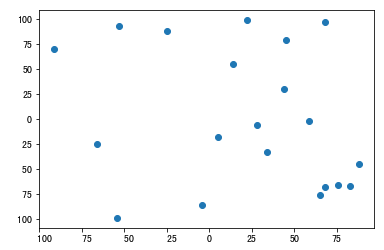

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

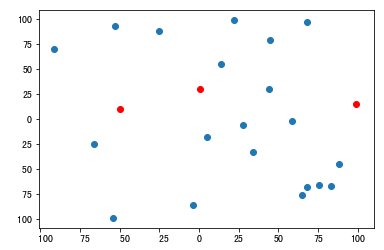

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro